In [1]:
# Basic Imports
from procgen_tools.imports import *
from procgen_tools import visualization, patch_utils, maze
import os
import matplotlib.pyplot as plt

This is more or less an investigation of the code found in procgen_tools/maze.py, ordered by title on interesting features that can be used for further investigation. Some of the key features we would like identify for the purposes of model investigation are the following:

1. Customized placement of the cheese
2. Customized placement of the mouse
3. An identification of the path from the mouse to the cheese.

In [2]:
# Seems like more or less this is the method of creating mazes
SEED = 1
NUM = 1
NUM_LEVELS = 1
venv = maze.create_venv(num=NUM, start_level=SEED, num_levels=NUM_LEVELS)

## Customized Placement of the Cheese

In [39]:
'''
Found on line 1207
def generate_mazes_with_cheese_at_location(
    cheese_location: Tuple[int, int], num_mazes: int = 50, skip_seed: int = -1
):
    Generate the first num_mazes seeds which have an empty/cheese square at cheese_location, 
    except the mazes are modified to instead have cheese at cheese_location. 
    
    Returns a list of full grids.

    Side note: Will probably have grandkids by this is done.
'''

seeds, mazes = maze.generate_mazes_with_cheese_at_location(cheese_location = (15,15), num_mazes=5, skip_seed = -1)

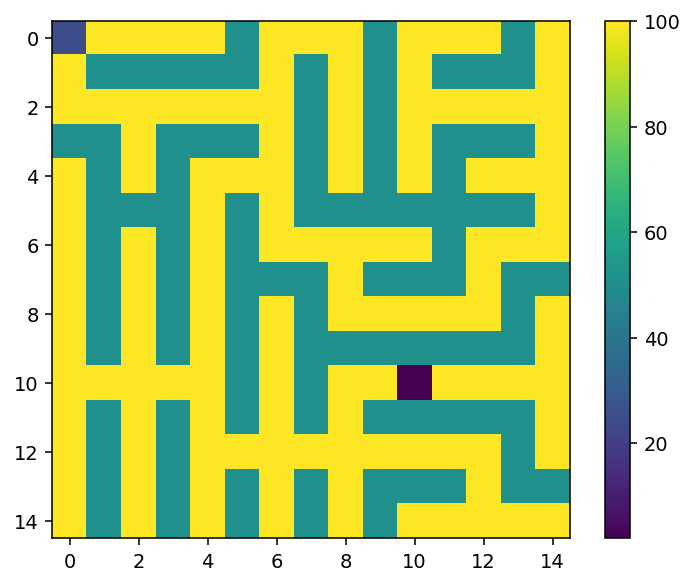

In [40]:
plt.imshow(mazes[0])
plt.colorbar()

???

Slow, and not very helpful. 
Next, let's try and utilize these three methods:

def get_envstate_from_seed(seed: int): 

def get_full_grid_from_seed(seed: int):

def get_inner_grid_from_seed(seed: int):

In [25]:
venv_state = maze.get_envstate_from_seed(seed=42) # This more or less calls the same function as above held in variable venv

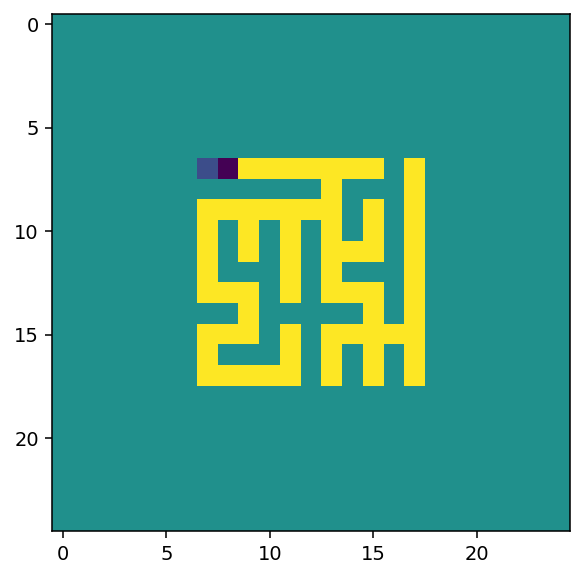

In [26]:
# This is just using matplotlib to show what is in the function get_full_grid_from_seed
plt.imshow(venv_state.full_grid())

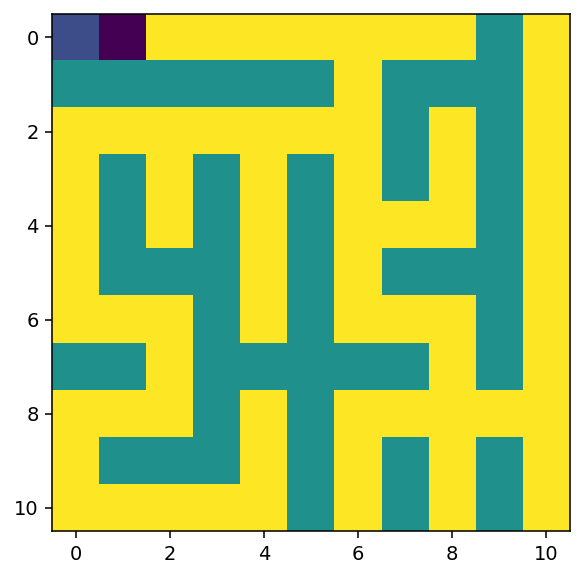

In [27]:
plt.imshow(venv_state.inner_grid())

In [28]:
cheese_pos = maze.get_cheese_pos_from_seed(seed=42)
print(cheese_pos)


(7, 8)


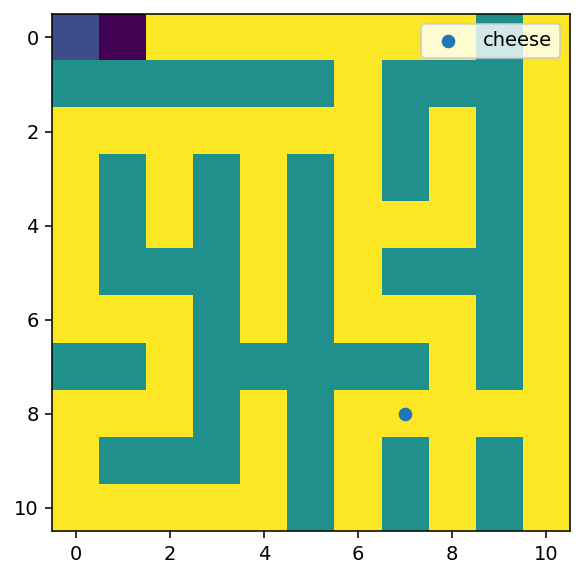

In [29]:
plt.imshow(venv_state.inner_grid())
plt.scatter([7], [8], label='cheese')
plt.legend()
plt.show()

Okay, cheese is placed and we know where it is. Let's try removing it.

In [32]:

'''
Line 1323
def remove_cheese_from_state(state):
    grid = state.full_grid()
    grid[grid == CHEESE] = EMPTY
    state.set_grid(grid)


def move_cheese_in_state(state, new_cheese_pos):
    grid = state.full_grid()
    grid[grid == CHEESE] = EMPTY
    grid[new_cheese_pos] = CHEESE
    state.set_grid(grid)
    
    '''

maze.move_cheese_in_state(venv_state, (2, 2))

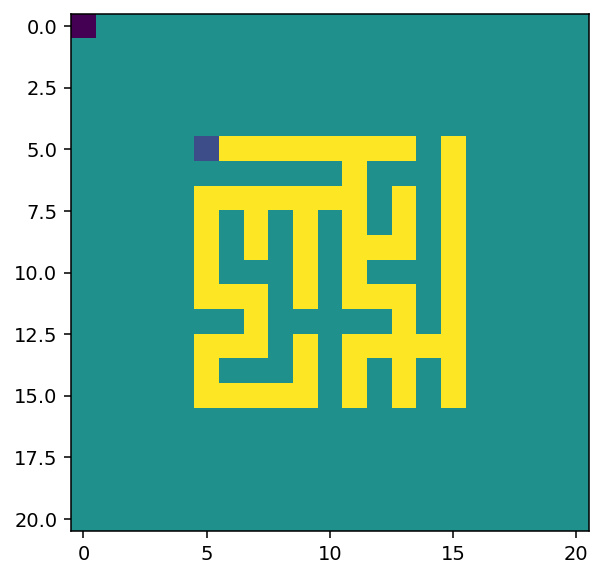

In [34]:
plt.imshow(venv_state.inner_grid())
plt.show()

In [35]:
# Very confused

## Customized Placement of the Mouse

In [38]:
# Preliminary Check for setting a mouse at certain locations:
seeds = maze.get_mazes_with_mouse_at_location(cheese_location = (10,10))

# Okay, so for all intents and purposes the mouse never spawns at (1, 1).
# Seems like a really poor way of getting mazes that fit within your qualifications
print(seeds)

[130, 183, 358, 409, 471]
